In [1]:
from datetime import datetime, timedelta
import time
import numpy as np
import pandas as pd
from sklearn import preprocessing
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import MultipleLocator
import matplotlib
plt.style.use('seaborn-white')
matplotlib.rcParams['axes.labelsize'] = 16
matplotlib.rcParams['xtick.labelsize'] = 16
matplotlib.rcParams['ytick.labelsize'] = 16
matplotlib.rcParams['text.color'] = 'k'

In [2]:
df= pd.read_csv("weeklydata_52w.txt", sep=" ")
#df= pd.read_csv("weeklydata.txt", sep=" ")
t2mf= pd.read_csv("t2m_LaReunion_avg.tsv",sep=" ")
rainf= pd.read_csv("rainfall_LaReunion_avg.tsv",sep=" ")

In [13]:
df  = df[df['Line'] > 52]
#weekly standardized abundance
Atnm=df['abnm']
error=np.std(Atnm)
#weekly epi data
epi=df['dengue_cases']
error3=np.std(epi)

#daily-to-weekly climate data
def boxaverage(arr, n):
    end =  n * int(len(arr)/n)
    return np.mean(arr[:end].values.reshape(-1, n), 1)
def boxmax(arr, n):
    end =  n * int(len(arr)/n)
    return np.amax(arr[:end].values.reshape(-1, n), 1)
def boxmin(arr, n):
    end =  n * int(len(arr)/n)
    return np.amin(arr[:end].values.reshape(-1, n), 1)
rainw=boxaverage(rainf['rainfall'],7)
rainw=rainw[53:]
#Atnm2=preprocessing.scale(df['At'])
error2=boxmax(rainf['rainfall'],7)-boxmin(rainf['rainfall'],7)
error2=error2[53:]
t2mw=boxaverage(t2mf['Celsius_scale'],7)
t2mw=t2mw[53:-1]
#Atnm2=preprocessing.scale(df['At'])
error4=boxmax(t2mf['Celsius_scale'],7)-boxmin(t2mf['Celsius_scale'],7)
error4=error4[53:-1]

#Atnmd = pd.DataFrame({'date':df['Date2'], 'data':Atnm2})
#Atnmd.date = pd.to_datetime(Atnmd.date)
#Atnmd[(Atnmd.date < '2018-03-25') & (Atnmd.date > '2017-12-01')];
#Atnmd.date=Atnmd.date[(Atnmd.date < '2018-03-25') & (Atnmd.date > '2017-12-01')];

In [9]:
dat=np.arange(2001,2018.24,1/52)
def convert_partial_year(number):
    year = int(number)
    d = timedelta(days=(number - year)*365)
    day_one = datetime(year,1,1)
    date = d + day_one
    return date
datesv=np.vectorize(convert_partial_year)
dates=datesv(dat)

In [37]:
from matplotlib.backends.backend_pdf import PdfPages
with PdfPages('Figure_LaReunion.pdf') as pdf:

    #dates = pd.date_range(start='2001-01-01',end='2018-04-01',freq='W')
    #dates2= dates[dates> '2017-09-30']
    
    style = dict(size=18, color='black', weight='bold')
    ml = MultipleLocator(5)

    ax1 = plt.axes()  # main axes
    ax1.plot(dates, Atnm,label = 'Standardized abundance');
    ax1.fill_between(dates, Atnm-error, Atnm+error,
    alpha=0.5,edgecolor = 'k')
    plt.xlabel('Date'); plt.ylabel('Standardized abundance ($\sigma$)',color='royalblue',size=20)
    ax1.xaxis.set_tick_params(reset=True)
    ax1.xaxis.set_major_locator(mdates.YearLocator(1))
    ax1.xaxis.set_minor_locator(mdates.MonthLocator())
    ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    ax1.xaxis.set_minor_formatter(plt.NullFormatter())
    plt.ylim((-4,8))
    plt.yticks(np.arange(-3, 5, 1.0))
    plt.xlim(('2010-01-01','2018-03-25'))
    plt.axhline(0, color='blue', linestyle='-.', linewidth=1)
    plt.axhline(2, color='blue', linestyle=':', linewidth=1)
    #ax1.xaxis.grid(True, 'major')
    #ax1.tick_params(axis='both',which='minor',bottom=True,direction='inout')
    #ax1.yaxis.grid(True, 'major')
    #ax1.xaxis.grid(True, 'major')
    ax1.axvspan('2017-10-01', '2018-03-25', color='grey', alpha=0.3)
    ax1.tick_params(axis='both', which='major', labelsize=16,direction='inout',length=6, width=2)
    ax1.tick_params(axis='x', which='minor', labelsize=16,direction='inout',length=6, width=1)
    #plt.axes().yaxis.set_minor_locator(ml)
    ax4 = ax1.twinx()
    ax4.plot(dates, epi,label = 'Dengue cases',color='purple');
    ax4.fill_between(dates, epi-error3, epi+error3,
    alpha=0.5, facecolor='purple',edgecolor = 'k')
    ax4.set_ylim(0,200)
    plt.yticks(np.arange(0, 151, 25.0))
    plt.ylabel('Dengue Cases',color='purple',size=20)
    ax4.tick_params(axis='both', which='major', labelsize=16,direction='inout',length=6, width=2)

    ax2 = plt.axes([0.66, 0.727, 0.2, 0.14]) # subplot axes
    ax2.plot(dates, Atnm,label = 'Standardized abundance');
    ax2.fill_between(dates, Atnm-error, Atnm+error,
    alpha=0.5, edgecolor = 'k')
    ax2.tick_params(axis='y',which='minor',left=True)
    ax2.xaxis.set_major_formatter(mdates.DateFormatter("%d %b '%y"))
    plt.xlim(('2017-10-01','2018-03-26'))
    ax2.set_ylim(-2,3.5)
    plt.yticks(np.arange(-2, 3.1, 1.0))
    plt.ylabel('Std. ab. ($\sigma$)',color='royalblue')
    plt.xticks(rotation=70)
    #ax2.yaxis.grid(True, 'major')
    plt.axhline(0, color='blue', linestyle='-.', linewidth=1)
    plt.axhline(2, color='blue', linestyle=':', linewidth=1)
    ax2.tick_params(axis='both', which='major', labelsize=16,direction='inout',length=6, width=2)
    #ax2.annotate('A', xy=(2, 1), xytext=(3, 1.5))
    ax2.text('2017-10-5', 2.5, "B", **style)
    ax3 = ax2.twinx()
    ax3.plot(dates, epi,label = 'Dengue cases',color='purple');
    ax3.fill_between(dates, epi-error3, epi+error3,
    alpha=0.5, facecolor='purple',edgecolor = 'k')
    ax3.set_ylim(0,160)
    plt.yticks(np.arange(0, 160, 25.0))
    ax3.xaxis.set_major_formatter(mdates.DateFormatter("%d %b '%y"))
    plt.ylabel('Cases',color='purple')
    ax3.axvspan('2017-12-27', '2018-01-09', color='goldenrod', alpha=0.4)
    ax3.axvspan('2018-01-06', '2018-01-09', color='goldenrod', alpha=0.4)
    ax3.axvspan('2018-01-09', '2018-01-20', color='goldenrod', alpha=0.4)
    ax3.axvspan('2018-01-14', '2018-01-16', color='goldenrod', alpha=0.4)
    ax3.axvspan('2018-01-25', '2018-02-04', color='goldenrod', alpha=0.4)
    ax3.axvspan('2018-03-01', '2018-03-06', color='goldenrod', alpha=0.4)
    ax3.axvspan('2018-03-13', '2018-03-20', color='goldenrod', alpha=0.4)
    ax3.tick_params(axis='both', which='major', labelsize=16,direction='inout',length=6, width=2)


    ax5 = plt.axes([0.17, 0.727, 0.2, 0.14]) # subplot axes
    ax5.plot(dates, rainw,label = 'Rainfall',color='green');
    ax5.fill_between(dates, rainw-error2, rainw+error2,
    alpha=0.5, facecolor='green',edgecolor = 'k')
    ax5.tick_params(axis='y',which='minor',left=True)
    ax5.xaxis.set_major_formatter(mdates.DateFormatter("%d %b '%y"))
    plt.xlim(('2017-10-01','2018-03-25'))
    ax5.set_ylim(0,270)
    plt.yticks(np.arange(0, 251, 50.0))
    plt.ylabel('Rainfall (mm)',color='green')
    plt.xticks(rotation=70)
    #ax5.yaxis.grid(True, 'major')
    ax5.text('2017-10-5', 220, "A", **style)
    plt.axhline(0, color='blue', linestyle='-.', linewidth=1)
    plt.axhline(2, color='blue', linestyle=':', linewidth=1)
    ax5.tick_params(axis='both', which='major', labelsize=16,direction='inout',length=6, width=2)
    ax6 = ax5.twinx()
    ax6.plot(dates, t2mw,label = 'Temperature',color='red');
    ax6.fill_between(dates, t2mw-error4, t2mw+error4,
    alpha=0.5, facecolor='red',edgecolor = 'k')
    ax6.set_ylim(15,31)
    plt.yticks(np.arange(15, 31, 5.0))
    ax6.xaxis.set_major_formatter(mdates.DateFormatter("%d %b '%y"))
    plt.ylabel('Temp. (\u00B0C)',color='red')
    ax6.axvspan('2017-12-27', '2018-01-09', color='goldenrod', alpha=0.4)
    ax6.axvspan('2018-01-06', '2018-01-09', color='goldenrod', alpha=0.4)
    ax6.axvspan('2018-01-09', '2018-01-20', color='goldenrod', alpha=0.4)
    ax6.axvspan('2018-01-14', '2018-01-16', color='goldenrod', alpha=0.4)
    ax6.axvspan('2018-01-25', '2018-02-04', color='goldenrod', alpha=0.4)
    ax6.axvspan('2018-03-01', '2018-03-06', color='goldenrod', alpha=0.4)
    ax6.axvspan('2018-03-13', '2018-03-20', color='goldenrod', alpha=0.4)
    ax6.tick_params(axis='both', which='major', labelsize=16,direction='inout',length=6, width=2)

    pdf.savefig()  # saves the current figure into a pdf page
    plt.close()

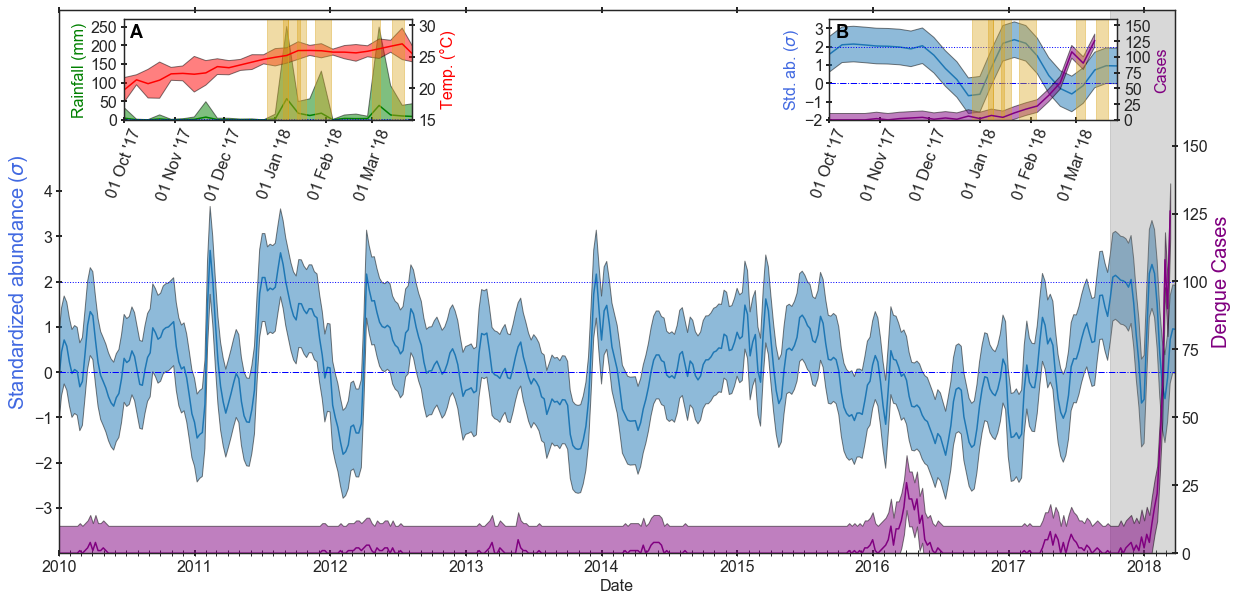

In [36]:
plt.rcParams["figure.figsize"] = (20,10)
style = dict(size=18, color='black', weight='bold')
ml = MultipleLocator(5)

ax1 = plt.axes()  # main axes
ax1.plot(dates, Atnm,label = 'Standardized abundance');
ax1.fill_between(dates, Atnm-error, Atnm+error,
alpha=0.5,edgecolor = 'k')
plt.xlabel('Date'); plt.ylabel('Standardized abundance ($\sigma$)',color='royalblue',size=20)
ax1.xaxis.set_tick_params(reset=True)
ax1.xaxis.set_major_locator(mdates.YearLocator(1))
ax1.xaxis.set_minor_locator(mdates.MonthLocator())
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax1.xaxis.set_minor_formatter(plt.NullFormatter())
plt.ylim((-4,8))
plt.yticks(np.arange(-3, 5, 1.0))
plt.xlim(('2010-01-01','2018-03-25'))
plt.axhline(0, color='blue', linestyle='-.', linewidth=1)
plt.axhline(2, color='blue', linestyle=':', linewidth=1)
#ax1.xaxis.grid(True, 'major')
#ax1.tick_params(axis='both',which='minor',bottom=True,direction='inout')
#ax1.yaxis.grid(True, 'major')
#ax1.xaxis.grid(True, 'major')
ax1.axvspan('2017-10-01', '2018-03-25', color='grey', alpha=0.3)
ax1.tick_params(axis='both', which='major', labelsize=16,direction='inout',length=6, width=2)
ax1.tick_params(axis='x', which='minor', labelsize=16,direction='inout',length=6, width=1)
#plt.axes().yaxis.set_minor_locator(ml)
ax4 = ax1.twinx()
ax4.plot(dates, epi,label = 'Dengue cases',color='purple');
ax4.fill_between(dates, epi-error3, epi+error3,
alpha=0.5, facecolor='purple',edgecolor = 'k')
ax4.set_ylim(0,200)
plt.yticks(np.arange(0, 151, 25.0))
plt.ylabel('Dengue Cases',color='purple',size=20)
ax4.tick_params(axis='both', which='major', labelsize=16,direction='inout',length=6, width=2)

ax2 = plt.axes([0.66, 0.727, 0.2, 0.14]) # subplot axes
ax2.plot(dates, Atnm,label = 'Standardized abundance');
ax2.fill_between(dates, Atnm-error, Atnm+error,
alpha=0.5, edgecolor = 'k')
ax2.tick_params(axis='y',which='minor',left=True)
ax2.xaxis.set_major_formatter(mdates.DateFormatter("%d %b '%y"))
plt.xlim(('2017-10-01','2018-03-26'))
ax2.set_ylim(-2,3.5)
plt.yticks(np.arange(-2, 3.1, 1.0))
plt.ylabel('Std. ab. ($\sigma$)',color='royalblue')
plt.xticks(rotation=70)
#ax2.yaxis.grid(True, 'major')
plt.axhline(0, color='blue', linestyle='-.', linewidth=1)
plt.axhline(2, color='blue', linestyle=':', linewidth=1)
ax2.tick_params(axis='both', which='major', labelsize=16,direction='inout',length=6, width=2)
#ax2.annotate('A', xy=(2, 1), xytext=(3, 1.5))
ax2.text('2017-10-5', 2.5, "B", **style)
ax3 = ax2.twinx()
ax3.plot(dates, epi,label = 'Dengue cases',color='purple');
ax3.fill_between(dates, epi-error3, epi+error3,
alpha=0.5, facecolor='purple',edgecolor = 'k')
ax3.set_ylim(0,160)
plt.yticks(np.arange(0, 160, 25.0))
ax3.xaxis.set_major_formatter(mdates.DateFormatter("%d %b '%y"))
plt.ylabel('Cases',color='purple')
ax3.axvspan('2017-12-27', '2018-01-09', color='goldenrod', alpha=0.4)
ax3.axvspan('2018-01-06', '2018-01-09', color='goldenrod', alpha=0.4)
ax3.axvspan('2018-01-09', '2018-01-20', color='goldenrod', alpha=0.4)
ax3.axvspan('2018-01-14', '2018-01-16', color='goldenrod', alpha=0.4)
ax3.axvspan('2018-01-25', '2018-02-04', color='goldenrod', alpha=0.4)
ax3.axvspan('2018-03-01', '2018-03-06', color='goldenrod', alpha=0.4)
ax3.axvspan('2018-03-13', '2018-03-20', color='goldenrod', alpha=0.4)
ax3.tick_params(axis='both', which='major', labelsize=16,direction='inout',length=6, width=2)


ax5 = plt.axes([0.17, 0.727, 0.2, 0.14]) # subplot axes
ax5.plot(dates, rainw,label = 'Rainfall',color='green');
ax5.fill_between(dates, rainw-error2, rainw+error2,
alpha=0.5, facecolor='green',edgecolor = 'k')
ax5.tick_params(axis='y',which='minor',left=True)
ax5.xaxis.set_major_formatter(mdates.DateFormatter("%d %b '%y"))
plt.xlim(('2017-10-01','2018-03-25'))
ax5.set_ylim(0,270)
plt.yticks(np.arange(0, 251, 50.0))
plt.ylabel('Rainfall (mm)',color='green')
plt.xticks(rotation=70)
#ax5.yaxis.grid(True, 'major')
ax5.text('2017-10-5', 220, "A", **style)
plt.axhline(0, color='blue', linestyle='-.', linewidth=1)
plt.axhline(2, color='blue', linestyle=':', linewidth=1)
ax5.tick_params(axis='both', which='major', labelsize=16,direction='inout',length=6, width=2)
ax6 = ax5.twinx()
ax6.plot(dates, t2mw,label = 'Temperature',color='red');
ax6.fill_between(dates, t2mw-error4, t2mw+error4,
alpha=0.5, facecolor='red',edgecolor = 'k')
ax6.set_ylim(15,31)
plt.yticks(np.arange(15, 31, 5.0))
ax6.xaxis.set_major_formatter(mdates.DateFormatter("%d %b '%y"))
plt.ylabel('Temp. (\u00B0C)',color='red')
ax6.axvspan('2017-12-27', '2018-01-09', color='goldenrod', alpha=0.4)
ax6.axvspan('2018-01-06', '2018-01-09', color='goldenrod', alpha=0.4)
ax6.axvspan('2018-01-09', '2018-01-20', color='goldenrod', alpha=0.4)
ax6.axvspan('2018-01-14', '2018-01-16', color='goldenrod', alpha=0.4)
ax6.axvspan('2018-01-25', '2018-02-04', color='goldenrod', alpha=0.4)
ax6.axvspan('2018-03-01', '2018-03-06', color='goldenrod', alpha=0.4)
ax6.axvspan('2018-03-13', '2018-03-20', color='goldenrod', alpha=0.4)
ax6.tick_params(axis='both', which='major', labelsize=16,direction='inout',length=6, width=2)